## Data Science Case Study

In [70]:
import numpy as np
import pandas as pd

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
df = pd.read_csv('/content/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [73]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [74]:
df.shape
#in dataset 29531 rows and 16 column(features)

(29531, 16)

In [75]:
df.describe()
#count having sum of NotNaN values

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [76]:
#count missing(NaN or Others) value in data set
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [77]:
#you can also write 
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [78]:
#how to find, how many percentage(%) missing value
len(df)

29531

In [79]:
missing_Value_Percentage = df.isnull().sum()/len(df)
missing_Value_Percentage

City          0.000000
Date          0.000000
PM2.5         0.155701
PM10          0.377231
NO            0.121296
NO2           0.121398
NOx           0.141715
NH3           0.349734
CO            0.069723
SO2           0.130507
O3            0.136196
Benzene       0.190410
Toluene       0.272290
Xylene        0.613220
AQI           0.158511
AQI_Bucket    0.158511
dtype: float64

In [80]:
type(missing_Value_Percentage)

pandas.core.series.Series

In [81]:
#convert into dataframe
missing_Value_Percentage_dataframe = pd.DataFrame(missing_Value_Percentage)
missing_Value_Percentage_dataframe

,0
City,0.000000
Date,0.000000
PM2.5,0.155701
PM10,0.377231
NO,0.121296
NO2,0.121398
NOx,0.141715
NH3,0.349734
CO,0.069723
SO2,0.130507


In [82]:
type(missing_Value_Percentage_dataframe)

pandas.core.frame.DataFrame

In [83]:
#give name of our data frame percentage column
missing_Value_Percentage_dataframe.columns=['proposition']
missing_Value_Percentage_dataframe

,proposition
City,0.000000
Date,0.000000
PM2.5,0.155701
PM10,0.377231
NO,0.121296
NO2,0.121398
NOx,0.141715
NH3,0.349734
CO,0.069723
SO2,0.130507


In [84]:
missing_Value_Percentage_dataframe = missing_Value_Percentage_dataframe.sort_values(by='proposition',ascending=False)
missing_Value_Percentage_dataframe

,proposition
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


In [85]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [86]:
#i print which city and there AQI(air quality index) of mean 
# i put into same city in one group
# there all AQI mean
# i print city wise mean of AQI 
group = pd.DataFrame(df.groupby(['City'])[['AQI']].mean())
group

,AQI
City,
Ahmedabad,452.122939
Aizawl,34.765766
Amaravati,95.299643
Amritsar,119.920959
Bengaluru,94.318325
Bhopal,132.827338
Brajrajnagar,150.280505
Chandigarh,96.498328
Chennai,114.502654


In [87]:
#print top 10 mean of AQI of each city in descending order
group = group.sort_values(by='AQI',ascending=False).head(10)
group

,AQI
City,
Ahmedabad,452.122939
Delhi,259.487744
Patna,240.782042
Gurugram,225.123882
Lucknow,217.973059
Talcher,172.886819
Jorapokhar,159.251621
Brajrajnagar,150.280505
Kolkata,140.566313


In [88]:
#now city become index
group = group.reset_index('City')
group

,City,AQI
0,Ahmedabad,452.122939
1,Delhi,259.487744
2,Patna,240.782042
3,Gurugram,225.123882
4,Lucknow,217.973059
5,Talcher,172.886819
6,Jorapokhar,159.251621
7,Brajrajnagar,150.280505
8,Kolkata,140.566313
9,Guwahati,140.111111


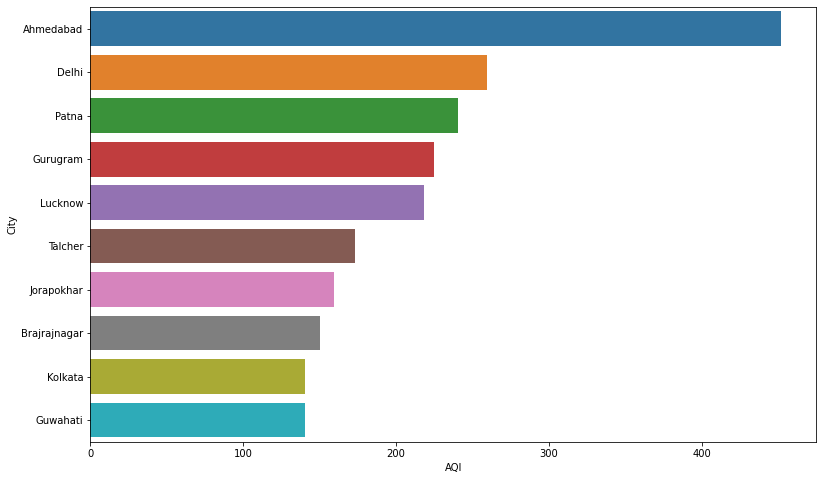

In [89]:
#now generate graph
#make sizing
plt.figure(figsize=(13,8))
#use seborn 
sns.barplot(data=group,x='AQI',y='City',orient='h')  

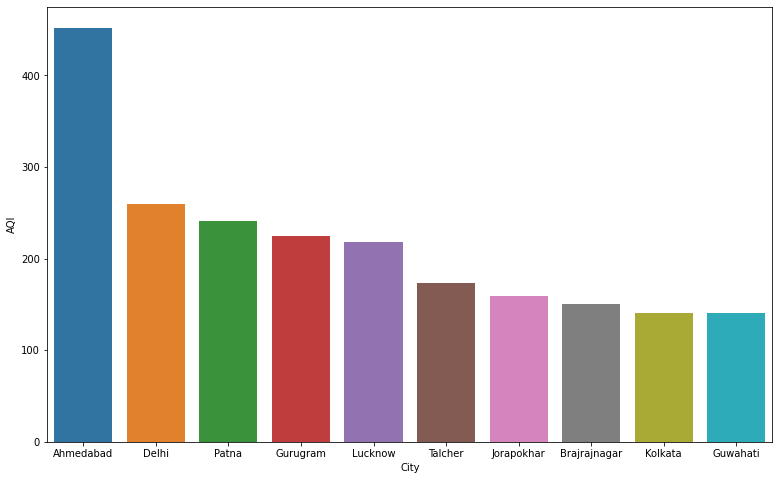

In [90]:
plt.figure(figsize=(13,8))
sns.barplot(data=group,x='City',y='AQI',orient='v')  

In [91]:
df.info()
#see our City, AQI_Bucket and Date type is Object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [92]:
#change type of Date object to date-time
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d') 
# see %Y is capital 

In [93]:
df.info()
#see our Date column type is 'datetime64[ns]'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [94]:
#add separate column as Month and Year
#see proper syntex df.Date.dt.month.astype(str) first df and second dt
df['month']=df.Date.dt.month.astype(str)
df['year']=df.Date.dt.year.astype(str)

In [95]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015


In [96]:
#line plot analysis for amount of particulate matter and gases  over the years
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

In [97]:
#enumerate give you index of each column
for i,col  in enumerate(cols):
  print(i,"----",col)

0 ---- PM2.5
1 ---- PM10
2 ---- NO2
3 ---- NOx
4 ---- NH3
5 ---- CO
6 ---- SO2
7 ---- O3
8 ---- Benzene
9 ---- Toluene
10 ---- Xylene


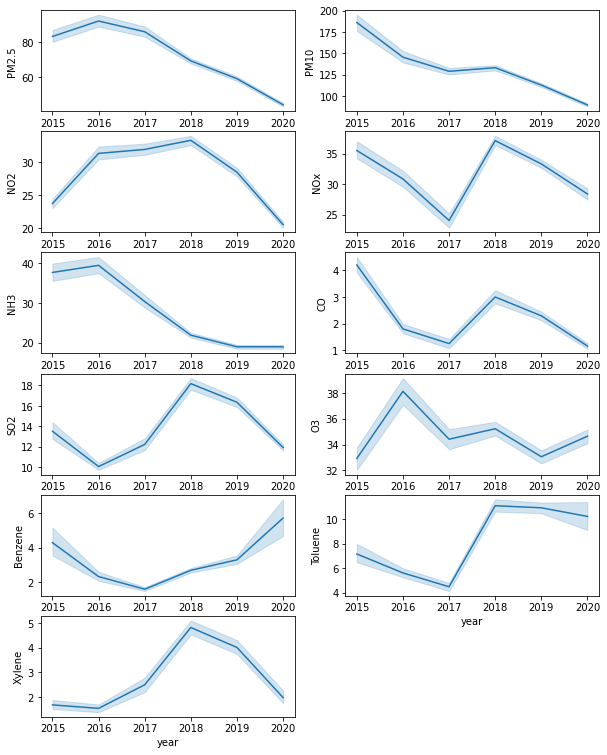

In [98]:
#drow line plot
#fig.add_subplot(row,column,start from 1)
#in our case 'i' start from 0
fig=plt.figure(figsize=(10,13))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='year',y=col,data=df)

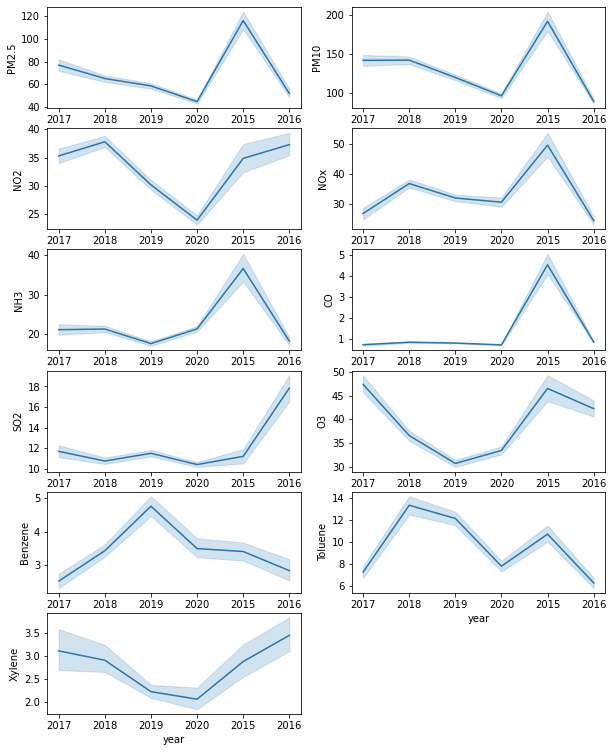

In [99]:
#with dropna in data = df.dropna()
#drow line plot
#fig.add_subplot(row,column,start from 1)
#in our case 'i' start from 0
fig=plt.figure(figsize=(10,13))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='year',y=col,data=df.dropna())

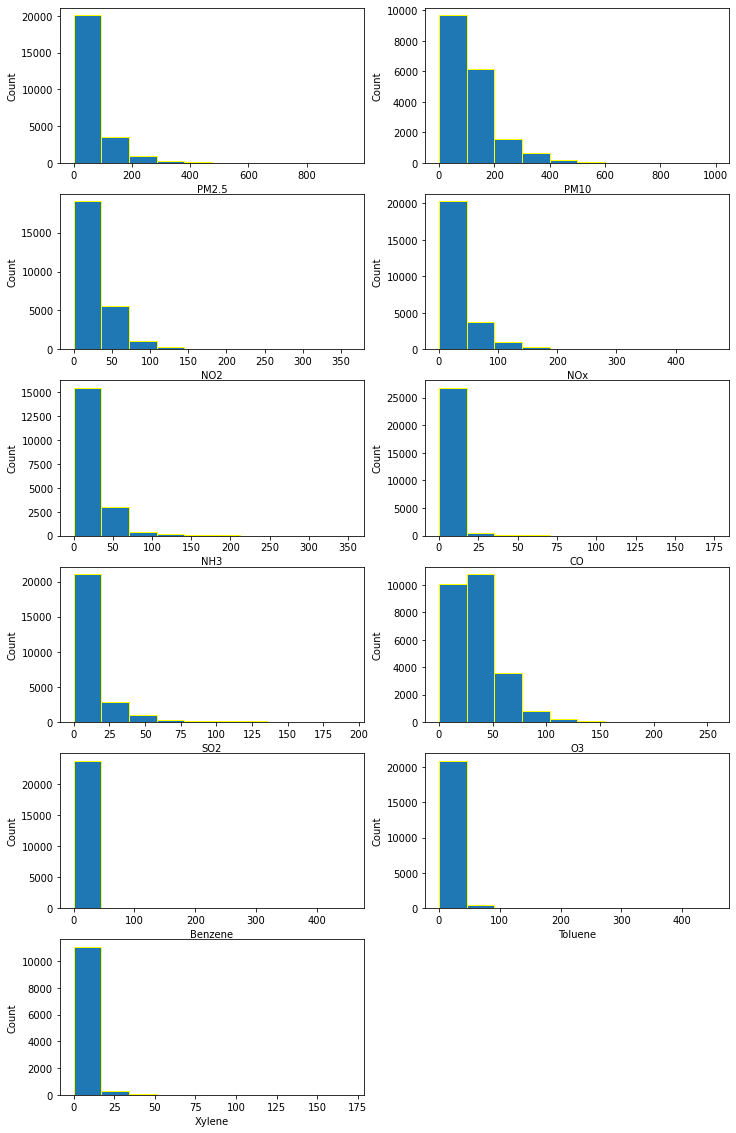

In [100]:
#distribuiton of various gases and particulate in air
#make histogram graph

cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

fig=plt.figure(figsize=(12,20))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(df[col].dropna(),bins=10,edgecolor='yellow')
    plt.xlabel(col)
    plt.ylabel('Count')

#i put df[col] bcz i want to make histogram of this columns
#see i put df[col].dropna() because some missing value in there
# see what is histogram properly in google


Text(0.5, 1.0, 'Correlation Analysis')

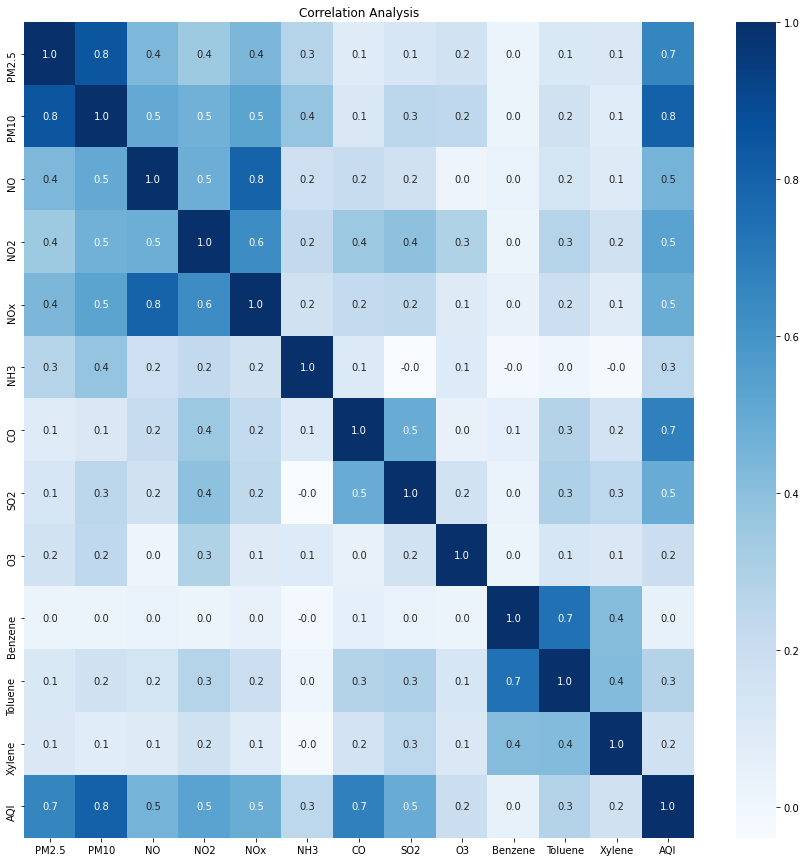

In [101]:
#correlation analysis
#correlation gives you how value correlate each other

plt.figure(figsize=(15,15))

#mask=np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(),
            annot=True,fmt='0.1f',
            cmap='Blues')
plt.title('Correlation Analysis')

In [102]:
#in city Ari quality index greter then 500 how many times
df['City'][df['AQI']>=500].value_counts()

Ahmedabad     413
Delhi          48
Patna          26
Gurugram       22
Lucknow        15
Jorapokhar      7
Amritsar        4
Talcher         4
Hyderabad       4
Guwahati        2
Name: City, dtype: int64

In [103]:
x=df[df['City']=='Ahmedabad']
x

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,1,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,1,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,1,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Ahmedabad,2020-06-27,62.12,118.67,9.18,56.35,19.86,NaN,0.49,12.44,68.05,1.32,37.76,1.62,92.0,Satisfactory,6,2020
2005,Ahmedabad,2020-06-28,31.57,NaN,6.37,23.99,16.40,NaN,0.52,11.01,26.34,1.37,49.58,1.34,82.0,Satisfactory,6,2020
2006,Ahmedabad,2020-06-29,29.75,127.98,9.06,25.15,18.92,NaN,0.67,12.10,34.99,1.39,60.21,0.79,74.0,Satisfactory,6,2020
2007,Ahmedabad,2020-06-30,40.02,121.10,7.09,58.92,33.41,NaN,0.73,16.39,41.64,1.21,44.10,1.35,98.0,Satisfactory,6,2020


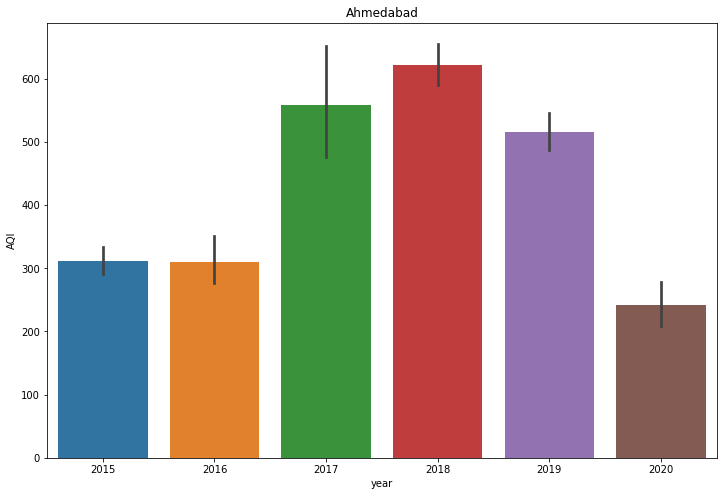

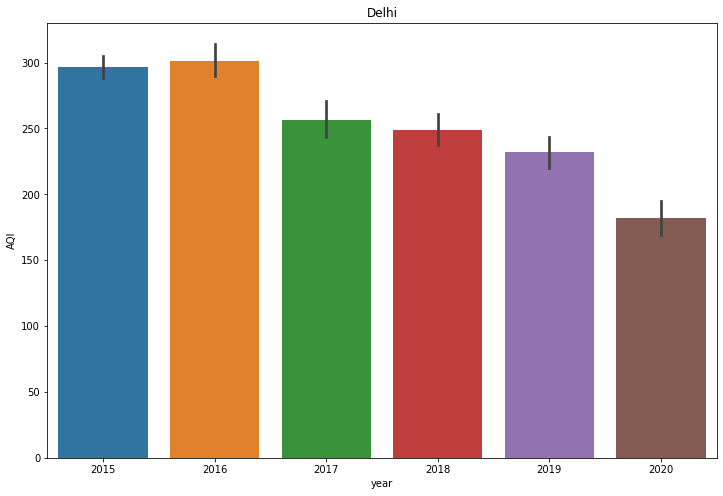

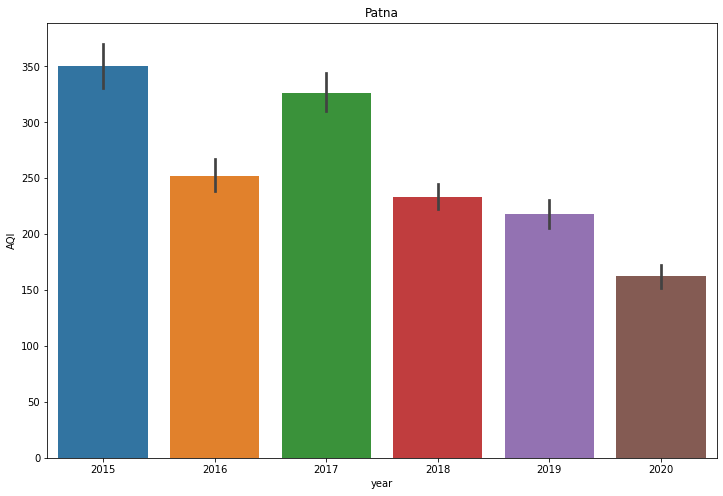

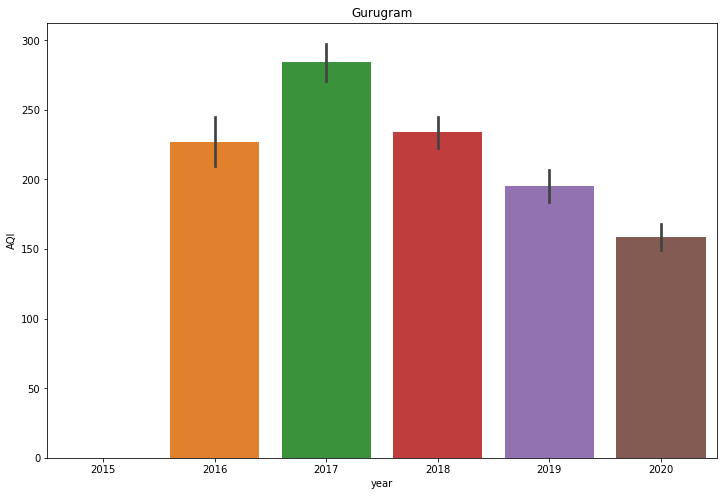

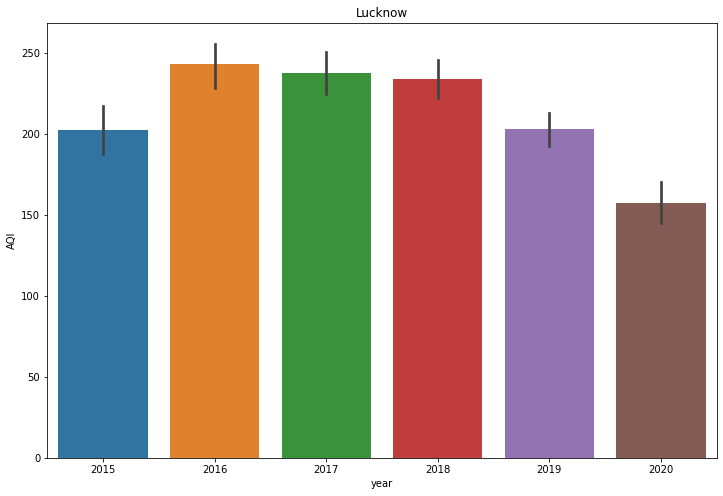

In [104]:
#plotting the average AQI over the years for top 5 cities which have AQI greater than 500

cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

for col in cols:
    plt.figure(figsize=(12,8))
    #selecting data pertaining to the selected city
    x=df[df['City']==col]
    sns.barplot(x='year',y='AQI',data=x)
    plt.title(col)

In [105]:
x=df.groupby('City')['CO'].sum().sort_values(ascending=False)
x.reset_index('City')

,City,CO
0,Ahmedabad,31070.77
1,Lucknow,4220.18
2,Delhi,3969.89
3,Bengaluru,3673.59
4,Patna,2617.84
5,Chennai,2117.62
6,Gurugram,1974.30
7,Talcher,1435.68
8,Brajrajnagar,1417.04
9,Hyderabad,1182.15


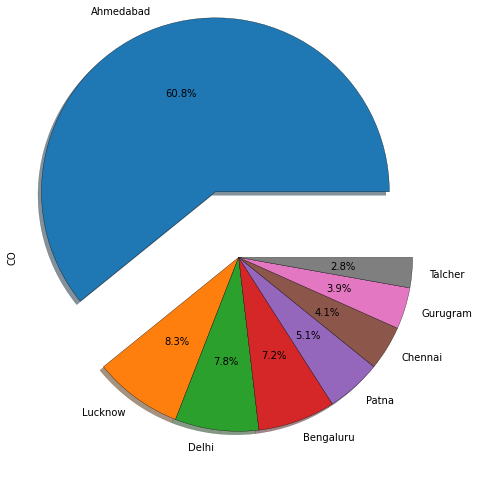

In [106]:
#try to explode=[1,0,0,0,0,0,0,0]
explode=[0.4,0,0,0,0,0,0,0]
plt.figure(figsize=(10,8))

'''grouping above columns by cities and 
taking 8 cities which have the highest sum'''

x=df.groupby('City')['CO'].sum().sort_values(ascending=False)
x.reset_index('City')
x[:8].plot.pie(shadow=True,autopct='%1.1f%%',
                explode=explode,
                wedgeprops={'edgecolor':'black','linewidth':0.3}
                )

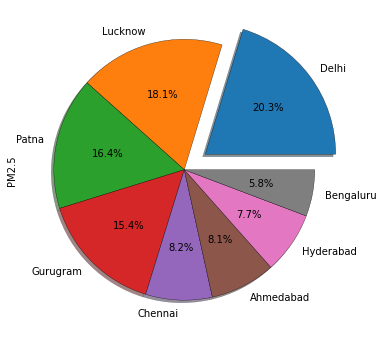

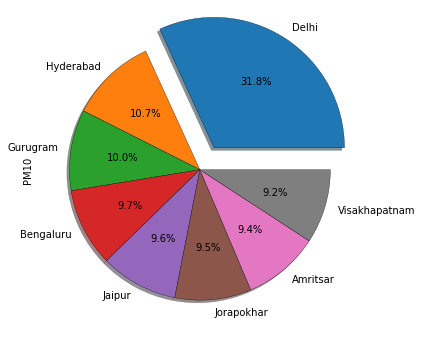

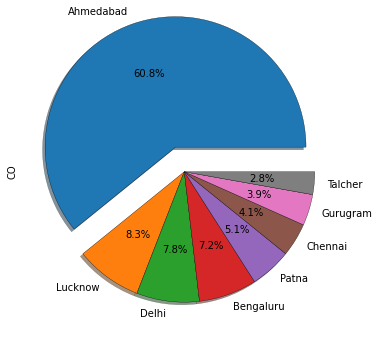

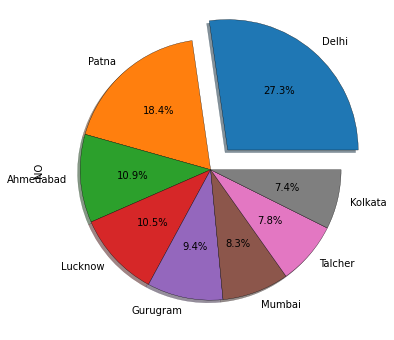

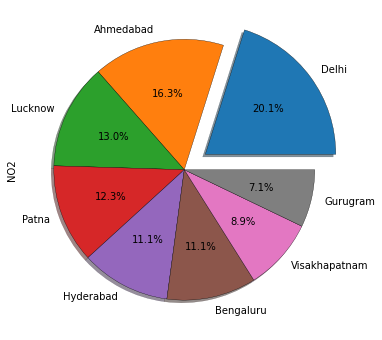

In [107]:
cols=['PM2.5','PM10','CO','NO','NO2']

cmap=plt.get_cmap('Spectral')
explode=[0.2,0,0,0,0,0,0,0]

for col in cols:
    plt.figure(figsize=(8,6))
    
    '''grouping above columns by cities and 
    taking 8 cities which have the highest sum'''
    
    x=df.groupby('City')[col].sum().sort_values(ascending=False)
    x.reset_index('City')
    x[:8].plot.pie(shadow=True,autopct='%1.1f%%',
                   explode=explode,
                   wedgeprops={'edgecolor':'black','linewidth':0.3}
                   )

In [108]:
x=df[(df['City']=='Ahmedabad') & (df['year']=='2018')]
x
#see all data in year 2018

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,year
1096,Ahmedabad,2018-01-01,84.46,NaN,7.58,87.62,48.40,NaN,7.58,102.36,69.02,14.48,45.60,6.33,278.0,Poor,1,2018
1097,Ahmedabad,2018-01-02,76.51,NaN,9.26,76.69,44.32,NaN,9.26,103.46,93.51,14.29,61.83,7.48,256.0,Poor,1,2018
1098,Ahmedabad,2018-01-03,63.88,NaN,13.87,69.32,44.16,NaN,13.87,70.30,105.33,12.77,60.99,9.50,300.0,Poor,1,2018
1099,Ahmedabad,2018-01-04,81.10,NaN,19.42,109.07,67.15,NaN,19.42,93.30,65.69,19.56,72.46,11.29,532.0,Severe,1,2018
1100,Ahmedabad,2018-01-05,73.61,NaN,25.96,173.08,103.80,NaN,25.96,93.86,36.51,17.69,61.48,9.93,534.0,Severe,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,Ahmedabad,2018-12-27,80.14,NaN,86.91,71.98,65.41,NaN,86.91,64.70,47.86,4.09,32.31,6.99,1084.0,Severe,12,2018
1457,Ahmedabad,2018-12-28,89.14,NaN,63.43,81.71,55.88,NaN,63.43,70.00,44.86,4.07,32.37,6.93,1319.0,Severe,12,2018
1458,Ahmedabad,2018-12-29,68.29,NaN,16.94,82.74,29.12,NaN,16.94,61.27,51.76,4.05,32.32,6.94,379.0,Very Poor,12,2018
1459,Ahmedabad,2018-12-30,67.75,NaN,17.63,81.78,29.28,NaN,17.63,57.37,63.34,4.07,32.30,6.98,396.0,Very Poor,12,2018


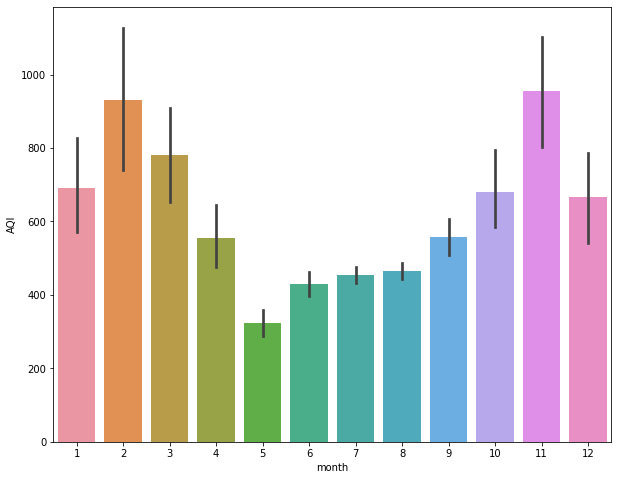

In [109]:
#from above bar plots we see that for Ahmedabad highest avearge AQI is for the year 2018 so let's 
#plot the monthly distribution of AQI for Ahmedabad for the year 2018

x=df[(df['City']=='Ahmedabad') & (df['year']=='2018')]

plt.figure(figsize=(10,8))
sns.barplot(x='month',y='AQI',data=x)

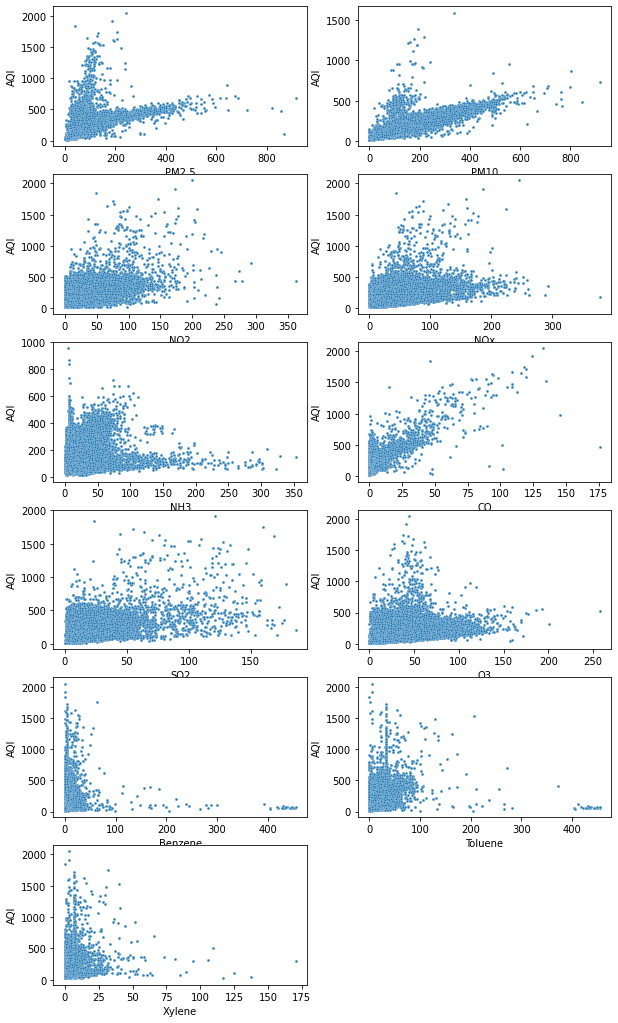

In [110]:
cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

fig=plt.figure(figsize=(10,18))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.scatterplot(x=col,y='AQI',data=df,s=8)
    plt.xlabel(col)
    plt.ylabel('AQI')

#plt.figure(figsize=(2.3,1.5))
#sns.scatterplot(x='Benzene',y='Toluene',data=df,s=8)